# Text Module Tutorial



In [56]:
import pandas as pd
import matplotlib.pyplot as plt

from pvops.text import utils
import text_class_example

## Problem statements:

### 1. Text Preprocessing
Process the documents into concise, machine learning-ready documents. Additionally, extract dates from the text.

### 2. Text Classification
The written tickets are used to make an inference on the specified event descriptor.


## Text processing 

### Import text data

In [57]:
folder = 'example_data//'
filename = 'example_ML_ticket_data.csv'
df = pd.read_csv(folder+filename)
df.head(n=3)

,Date_EventStart,Date_EventEnd,Asset,CompletionDesc,Cause,ImpactLevel,randid
0,8/16/2018 9:00,8/22/2018 17:00,Combiner,cb 1.18 was found to have contactor issue woul...,0000 - Unknown.,Underperformance,38
1,9/17/2018 18:25,9/18/2018 9:50,Pad,self resolved. techdispatched: no,004 - Under voltage.,Underperformance,46
2,8/26/2019 9:00,11/5/2019 17:00,Facility,"all module rows washed, waiting for final repo...",0000 - Unknown,Underperformance,62


### Establish settings

Specify column names which will be used in this pipeline.

In [58]:
DATA_COLUMN = "CompletionDesc"   # Contains document
LABEL_COLUMN = "Asset"           # Establish event descriptor which will be inferenced by classifiers
DATE_COLUMN = 'Date_EventStart'  # Date of ticket (start date, end date; any reflective date will do), used in date extracting pipeline to replace information not specified in ticket

### Step 0: If needed, map raw labels to a cleaner set of labels

In [59]:
asset_remap_filename = 'remappings_asset.csv'
REMAPPING_COL_FROM = 'in'
REMAPPING_COL_TO = 'out_'
remapping_df = pd.read_csv(folder+asset_remap_filename)

In [60]:
remapping_col_dict = {
    'attribute_col': LABEL_COLUMN,
    'remapping_col_from': REMAPPING_COL_FROM,
    'remapping_col_to': REMAPPING_COL_TO
}

df_remapped_assets = utils.remap_attributes(df.iloc[30:].copy(), remapping_df.iloc[20:].copy(), remapping_col_dict, allow_missing_mappings=True)

df = df_remapped_assets

In [61]:
df[LABEL_COLUMN].value_counts()

Asset
inverter                  26
facility                  24
tracker                    6
combiner                   4
substation                 2
other                      2
transformer                1
ground-mount pv system     1
energy storage             1
energy meter               1
met station                1
pyranometer                1
Name: count, dtype: int64

### Step 1: Establish example instance and render preliminary information about the tickets

In [62]:
# Establish the class object (found in text_class_example.py)
print(df[LABEL_COLUMN].value_counts())

e = text_class_example.Example(df, LABEL_COLUMN)
e.summarize_text_data(DATA_COLUMN)

Asset
inverter                  26
facility                  24
tracker                    6
combiner                   4
substation                 2
other                      2
transformer                1
ground-mount pv system     1
energy storage             1
energy meter               1
met station                1
pyranometer                1
Name: count, dtype: int64
DETAILS
  70 samples
  0 invalid documents
  29.16 words per sample on average
  Number of unique words 881
  2041.00 total words


### Visualize timeseries of ticket publications

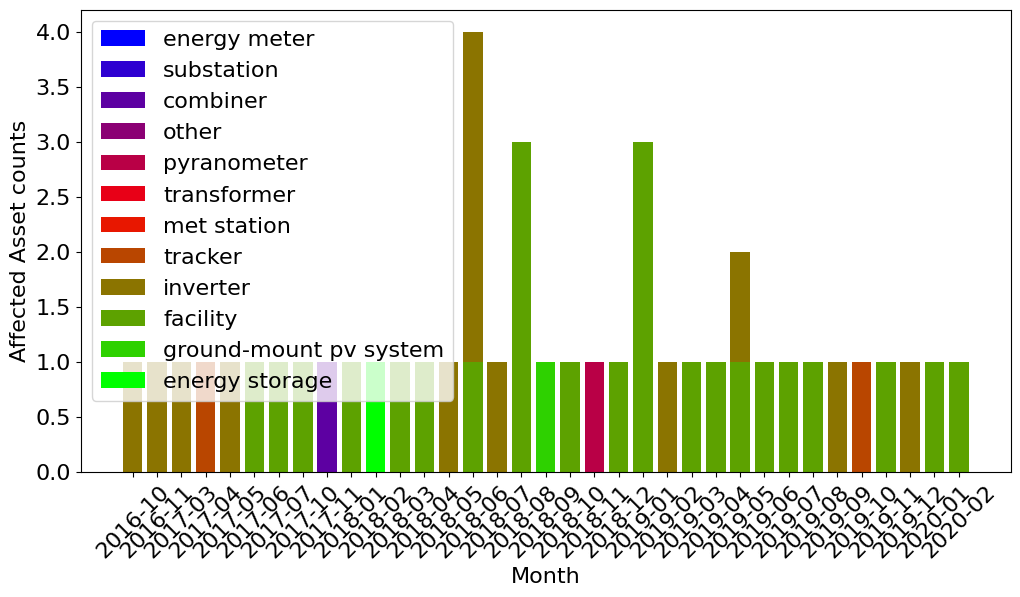

In [63]:
fig = e.visualize_attribute_timeseries(DATE_COLUMN)
plt.show()

### Functionality 1.1: Extract dates

In [64]:
# Extract date from ticket, if any. This framework is not 100% correct.
dates_df = e.extract_dates(DATA_COLUMN, DATE_COLUMN, SAVE_DATE_COLUMN='ExtractedDates')
dates_df

,CompletionDesc,ExtractedDates
0,8/39/19 inverter was faulted with lp15 (low pr...,[2019-08-17 07:35:00]
1,"11,july 2018 -upon arrival w-a6-2, inverter is...","[2018-07-11 18:55:00, 2018-06-02 18:55:00, 201..."
2,arrived site checked into c4. i was able to pi...,[2020-05-26 14:45:00]
3,c4 closed site remotely. techdispatched: no,[]
4,inspection troubleshooting malfunctioning trac...,[]
...,...,...
65,cleared cleared alert however psi is -3 invert...,[2016-11-03 09:28:00]
66,c4 closed remotely. techdispatched: no,[]
67,pure power fixed damaged source circuits did f...,"[2019-04-16 09:00:00, 2019-03-16 15:15:00]"
68,checked network connection to rm-1 didn't see ...,[]


### Functionality 1.2: Preprocess data for the Machine Learning classification

In [65]:
preprocessed_df = e.prep_data_for_ML(DATA_COLUMN, DATE_COLUMN)
preprocessed_df

,CompletionDesc,CleanDesc
0,"either reboot datalogger worked, issue resolve...",either reboot datalogger worked issue resolved...
1,. techdispatched: no,techdispatched
2,inverter resolved. techdispatched: no,inverter resolved techdispatched
3,"10/2/19 e-1, row 51, e1-3-51-1. tracker tracki...",row tracker tracking wrong lubed gear boxes tr...
4,confirmed that cb 1.1.6 was turned off. verifi...,confirmed cb turned verified voltage array tur...
...,...,...
59,c4 closed remotely. techdispatched: no,closed remotely techdispatched
60,switchgear breaker for 2.6 was tripped. breake...,switchgear breaker tripped breaker inverter tr...
61,. techdispatched: no,techdispatched
62,resolved.. techdispatched: no,resolved techdispatched


### Results of text processing

In [66]:
print("Pre-text processing")
e.summarize_text_data(DATA_COLUMN)

print("\nPost-text processing")
e.summarize_text_data('CleanDesc')

Pre-text processing
DETAILS
  64 samples
  0 invalid documents
  27.95 words per sample on average
  Number of unique words 778
  1789.00 total words

Post-text processing
DETAILS
  64 samples
  0 invalid documents
  17.31 words per sample on average
  Number of unique words 489
  1108.00 total words


### Visualizing entropy of clustering technique pre- and post- processing

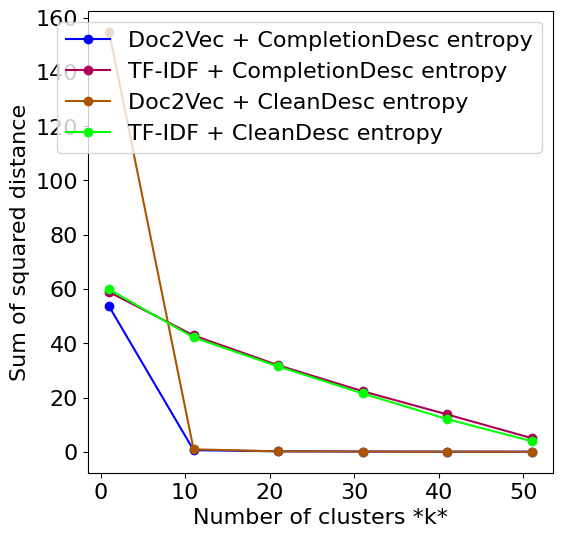

In [67]:
fig = e.visualize_cluster_entropy([DATA_COLUMN, 'CleanDesc'])
plt.show()

### Functionality 1.3: Frequency plot

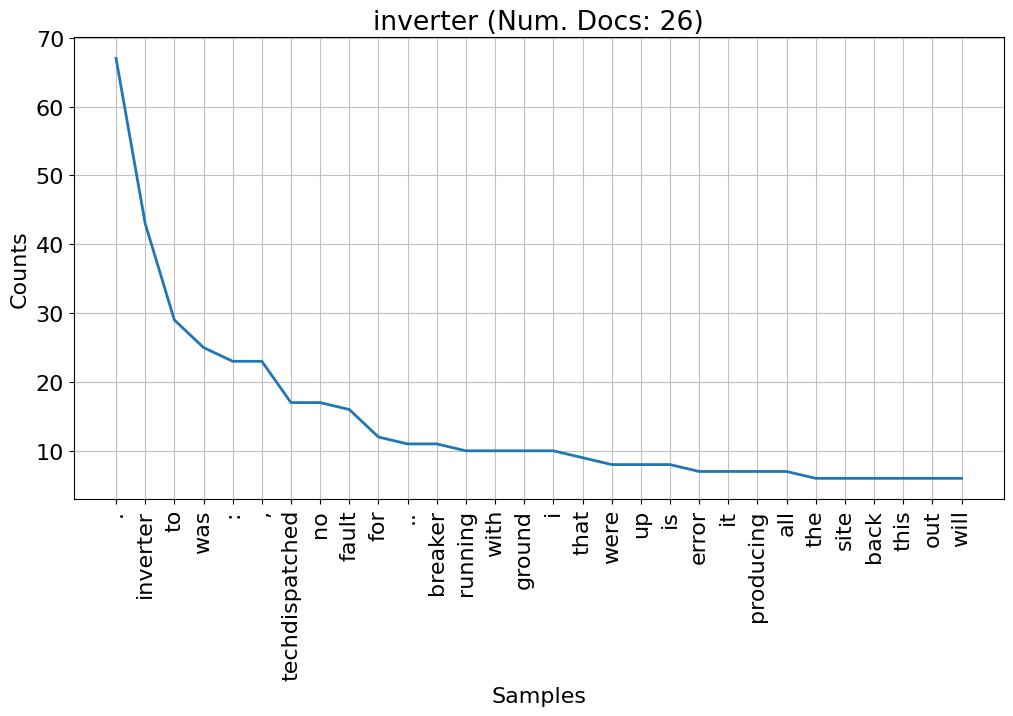

In [68]:
# Frequency plot on unprocessed data
fig = e.visualize_freqPlot(LBL_CAT='inverter', DATA_COLUMN=DATA_COLUMN)
plt.show()

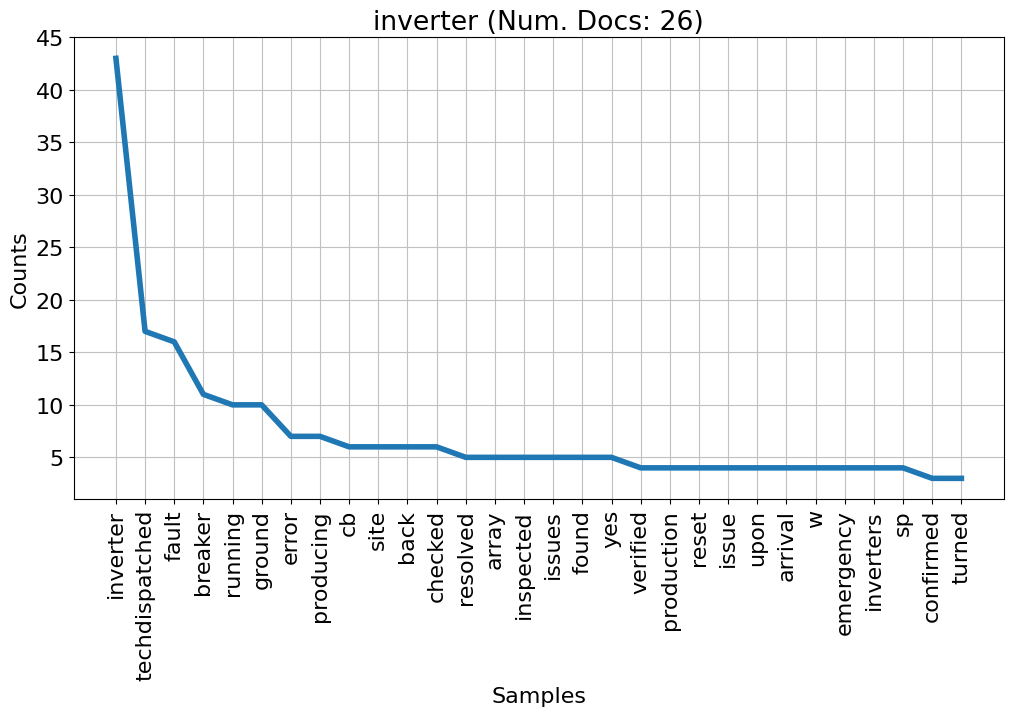

In [69]:
# Frequency plot on processed data
fig = e.visualize_freqPlot(LBL_CAT='inverter',
                            # Optional, kwargs into nltk's FreqDist
                            graph_aargs = {
                                'linewidth':4
                            }
                        )
plt.show()

### Hint: Use the below code to visualize frequency plots for all assets
    
    set_labels = list(set(e.df[e.LABEL_COLUMN].tolist()))
    for lbl in set_labels:
        fig = e.visualize_freqPlot(LBL_CAT=lbl)
        plt.show()

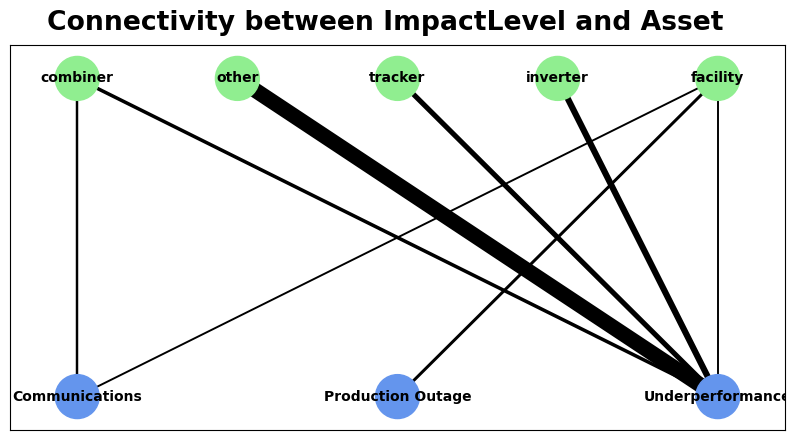

In [70]:
# Only supports two attributes
om_col_dict = {
    'attribute1_col': 'Asset',
    'attribute2_col': 'ImpactLevel'
}

fig, G = e.visualize_attribute_connectivity(
    om_col_dict, 
    figsize=[10,5],
    graph_aargs = {'with_labels':True,
    'font_weight':'bold',
    'node_size': 1000,
    'font_size':10}
)

### Functionality 2.1: Conduct supervised classification on tickets using a cross-validated grid search

In [71]:
# Setting few cross validation splits because of few example data
results, best_model = e.classify_supervised(n_cv_splits=2, embedding='tfidf')
print('best_model', best_model)
results

Starting ML analysis with TF-IDF embeddings


/home/klbonne/.pyenv/versions/3.11.5/envs/pvops/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/klbonne/.pyenv/versions/3.11.5/envs/pvops/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/klbonne/.pyenv/versions/3.11.5/envs/pvops/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/klbonne/.pyenv/versions/3.11.5/envs/pvops/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/klbonne/.pyenv/versions/3.11.5/envs/pvops/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reac

best_model Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 3))),
                ('clf', AdaBoostClassifier())])


,estimator,min_score,mean_score,max_score,std_score,mean_fit_time,clf__C,clf__max_iter,tfidf__ngram_range,tfidf__stop_words,...,clf__splitter,clf__alpha,clf__batch_size,clf__hidden_layer_sizes,clf__learning_rate,clf__solver,clf__loss,clf__n_estimators,clf__max_samples,clf__algorithm
67,AdaBoostClassifier,0.445812,0.487584,0.529356,0.041772,0.20235,NaN,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,0.8,NaN,NaN,100,NaN,SAMME.R
66,AdaBoostClassifier,0.445812,0.487584,0.529356,0.041772,0.10263,NaN,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,0.8,NaN,NaN,50,NaN,SAMME.R
65,AdaBoostClassifier,0.445812,0.487584,0.529356,0.041772,0.207092,NaN,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,0.9,NaN,NaN,100,NaN,SAMME.R
64,AdaBoostClassifier,0.445812,0.487584,0.529356,0.041772,0.103079,NaN,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,0.9,NaN,NaN,50,NaN,SAMME.R
62,AdaBoostClassifier,0.445812,0.487584,0.529356,0.041772,0.100246,NaN,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,50,NaN,SAMME.R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,SVC,0.234722,0.234722,0.234722,0.0,0.006326,1.0,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,SVC,0.234722,0.234722,0.234722,0.0,0.006342,1.0,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SVC,0.221591,0.228157,0.234722,0.006566,0.005903,1.0,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,PassiveAggressiveClassifier,NaN,NaN,NaN,NaN,0.0048,0.0,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,NaN,NaN,hinge,NaN,NaN,NaN


### Functionality 1.4: Conduct unsupervised clustering  on tickets using a cross-validated grid search

In [78]:
# Setting few cross validation splits because of few example data
results, best_model = e.classify_unsupervised(n_cv_splits=2, embedding='tfidf')
print('best_model', best_model)
results

Starting ML analysis with TF-IDF embeddings


/home/klbonne/.pyenv/versions/3.11.5/envs/pvops/lib/python3.11/site-packages/sklearn/cluster/_birch.py:726: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (11). Decrease the threshold.
  warnings.warn(
/home/klbonne/.pyenv/versions/3.11.5/envs/pvops/lib/python3.11/site-packages/sklearn/cluster/_birch.py:726: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (11). Decrease the threshold.
  warnings.warn(
/home/klbonne/.pyenv/versions/3.11.5/envs/pvops/lib/python3.11/site-packages/sklearn/cluster/_birch.py:726: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (11). Decrease the threshold.
  warnings.warn(
/home/klbonne/.pyenv/versions/3.11.5/envs/pvops/lib/python3.11/site-packages/sklearn/cluster/_birch.py:726: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (11). Decrease the threshold.
  warnings.warn(


best_model Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 3))),
                ('to_dense', DataDensifier()), ('clf', Birch(n_clusters=11))])


,estimator,min_score,mean_score,max_score,std_score,mean_fit_time,clf__damping,clf__max_iter,tfidf__ngram_range,tfidf__stop_words,clf__branching_factor,clf__n_clusters,clf__threshold,clf__init,clf__n_init,clf__bandwidth,clf__bin_seeding
7,Birch,0.629666,0.647877,0.666088,0.018211,0.007,NaN,NaN,"(1, 3)",None,100,11,0.5,NaN,NaN,NaN,NaN
4,Birch,0.629666,0.647877,0.666088,0.018211,0.007483,NaN,NaN,"(1, 3)",None,50,11,0.5,NaN,NaN,NaN,NaN
1,AffinityPropagation,0.42079,0.522839,0.624887,0.102048,0.010927,0.5,600,"(1, 3)",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AffinityPropagation,0.42079,0.517806,0.614823,0.097016,0.010343,0.9,600,"(1, 3)",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,AffinityPropagation,0.425789,0.507145,0.588502,0.081356,0.010901,0.5,200,"(1, 3)",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AffinityPropagation,0.425789,0.503147,0.580505,0.077358,0.013031,0.9,200,"(1, 3)",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,KMeans,0.303348,0.434765,0.566182,0.131417,0.01097,NaN,NaN,"(1, 3)",None,NaN,11,NaN,random,10,NaN,NaN
15,KMeans,0.368506,0.407506,0.446506,0.039,0.057041,NaN,NaN,"(1, 3)",None,NaN,11,NaN,random,100,NaN,NaN
10,KMeans,0.22441,0.317554,0.410697,0.093144,0.06142,NaN,NaN,"(1, 3)",None,NaN,11,NaN,k-means++,10,NaN,NaN
14,KMeans,0.268359,0.303465,0.338572,0.035107,0.034123,NaN,NaN,"(1, 3)",None,NaN,11,NaN,random,50,NaN,NaN


In [73]:
e.predict_best_model(ml_type = 'supervised')

Best algorithm found:
 Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 3))),
                ('clf', AdaBoostClassifier())])
Predictions stored to Supervised_Pred_Asset in `df` attribute
Score: 0.5729910714285715


In [74]:
e.predict_best_model(ml_type = 'unsupervised')

Best algorithm found:
 Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 3))),
                ('to_dense', DataDensifier()),
                ('clf', AffinityPropagation(damping=0.9, max_iter=600))])
Predictions stored to Unsupervised_Pred_Asset in `df` attribute
Score: 0.42789964962778615


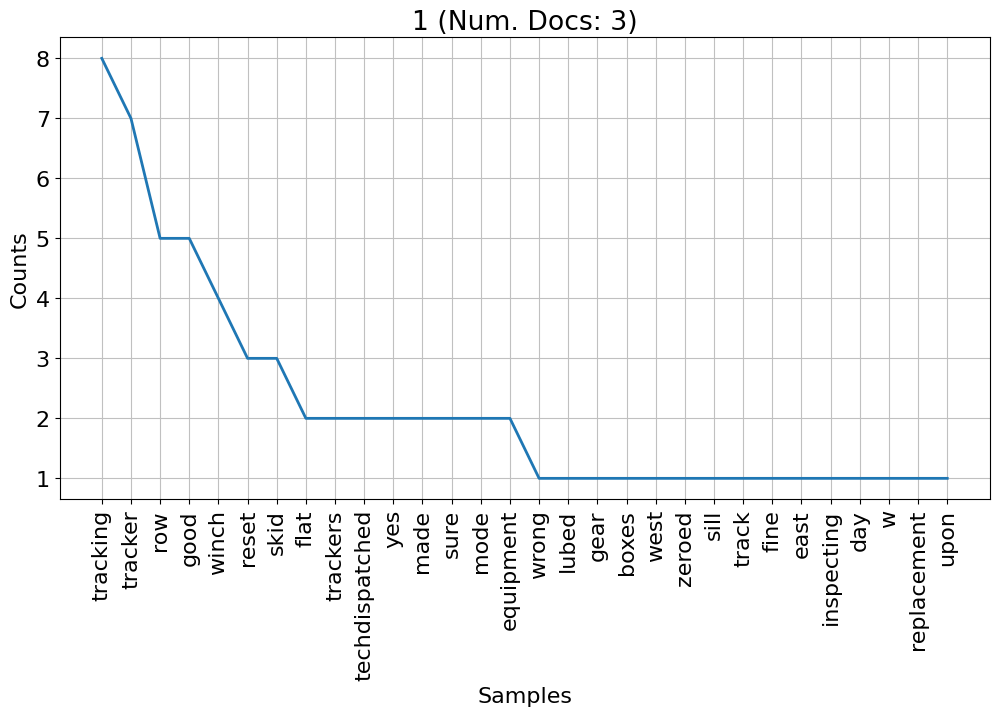

FreqDist({'tracking': 8, 'tracker': 7, 'row': 5, 'good': 5, 'winch': 4, 'reset': 3, 'skid': 3, 'flat': 2, 'trackers': 2, 'techdispatched': 2, ...})

In [75]:
e.LABEL_COLUMN = 'Unsupervised_Pred_Asset'
e.visualize_freqPlot(LBL_CAT = 1)

## Visualize Word Clusters

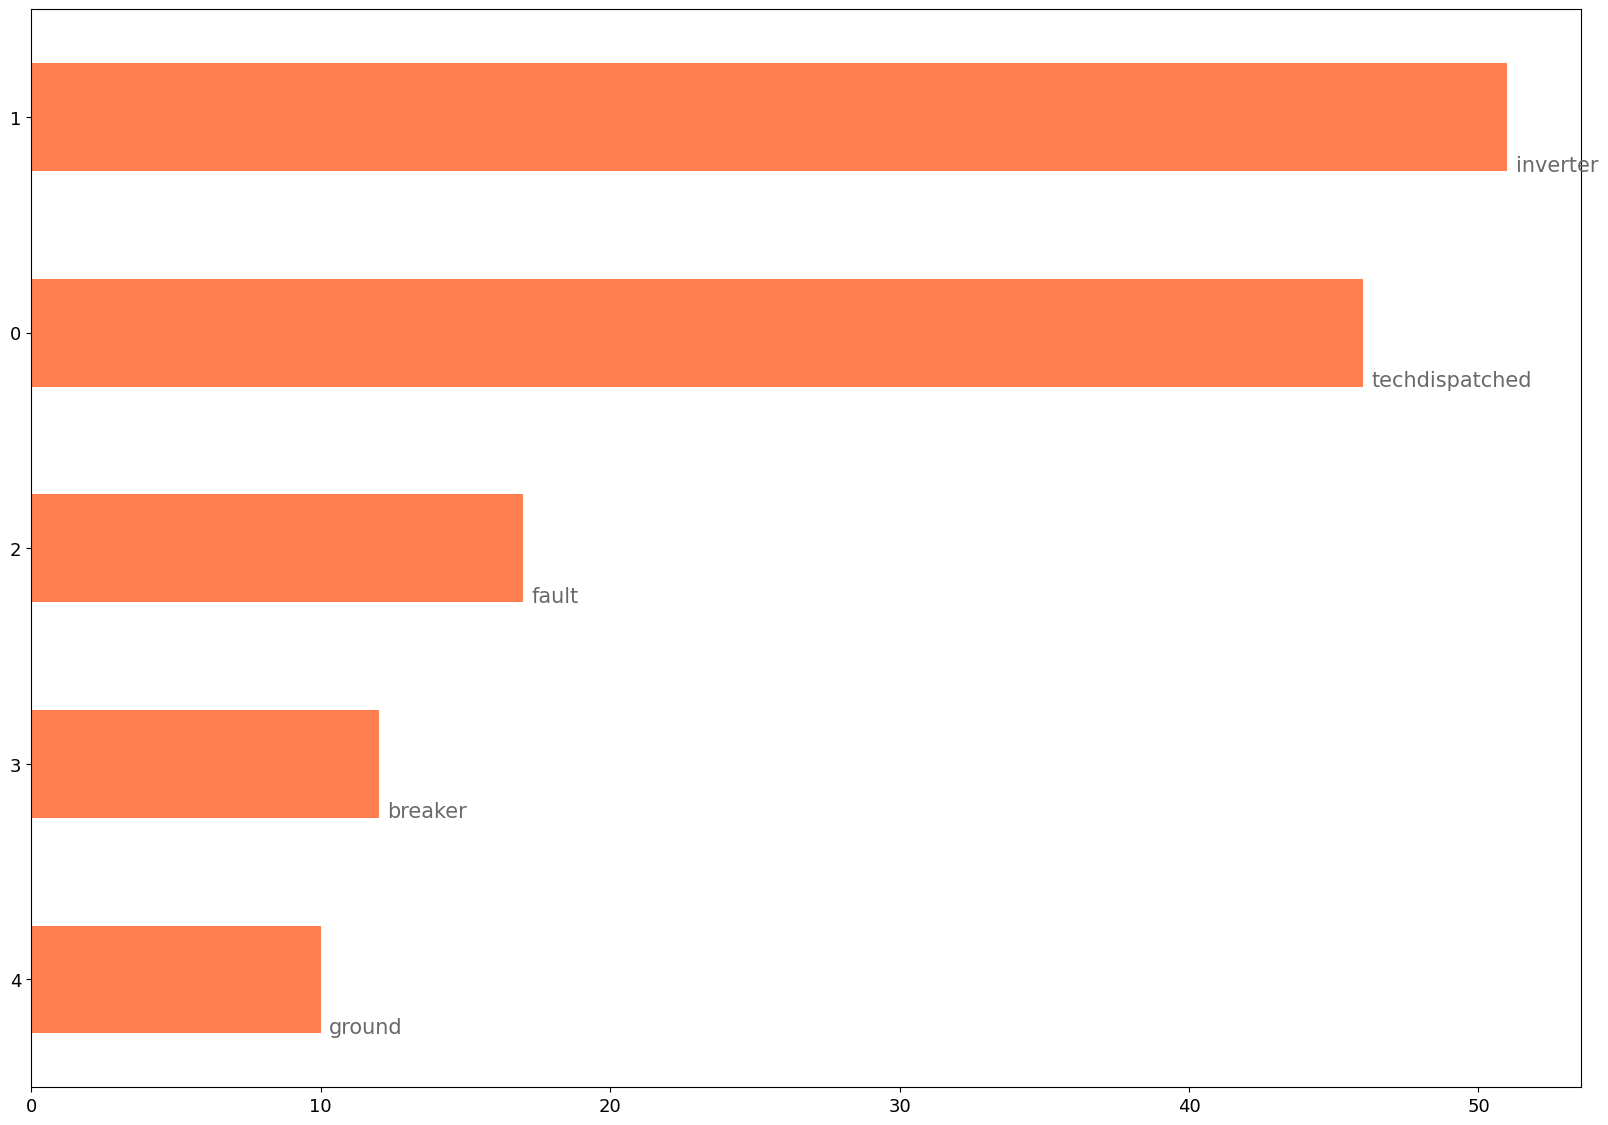

In [76]:
fig = e.visualize_document_clusters(min_frequency=10, DATA_COLUMN='CleanDesc')
plt.show()

Seeing the popularity of `techdispatched`, one might consider adding `techdispatched` to the stopwords list